In [1]:
#Importing essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to see plots inside notebook
%matplotlib inline

# for better looking plots
sns.set(style="whitegrid")


In [2]:
df = pd.read_excel(r"C:\Users\Padmavati\Downloads\Netflix datasest.xlsx")


In [3]:
df.head()


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# --------------------------------------------
# Handling Missing Data (Null values)
# --------------------------------------------

# Filling missing values in key columns
df.fillna({'director': 'Unknown',
           'cast': 'Not Specified',
           'country': 'Unknown',
           'rating': 'Not Rated'}, inplace=True)

# Dropping rows with missing 'date_added' and 'duration'
df.dropna(subset=['date_added', 'duration'], inplace=True)

In [6]:
# -------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------
# What are the most common types of content?
print(df['type'].value_counts())

# What are the most frequent ratings?
print(df['rating'].value_counts())

# How many titles were added each year?
print(df['release_year'].value_counts().sort_index(ascending=False).head(10))  # latest 10 years

# What are the most common genres (listed_in)?
print(df['listed_in'].value_counts().head(10))


type
Movie      6128
TV Show    2666
Name: count, dtype: int64
rating
TV-MA        3205
TV-14        2157
TV-PG         861
R             799
PG-13         490
TV-Y7         333
TV-Y          306
PG            287
TV-G          220
NR             79
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
Name: count, dtype: int64
release_year
2021     592
2020     953
2019    1030
2018    1146
2017    1031
2016     901
2015     557
2014     352
2013     287
2012     236
Name: count, dtype: int64
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documen

In [7]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style
sns.set(style="whitegrid")

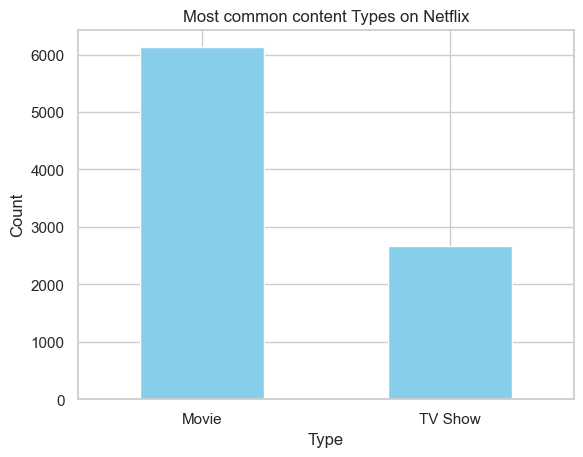

In [8]:
# ------------------------------------
# Plot 1: Most Common Content Types
# ------------------------------------
# Bar plot showing the number of Movies vs TV Shows
df['type'].value_counts().plot(kind='bar' , color='skyblue')
plt.title('Most common content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

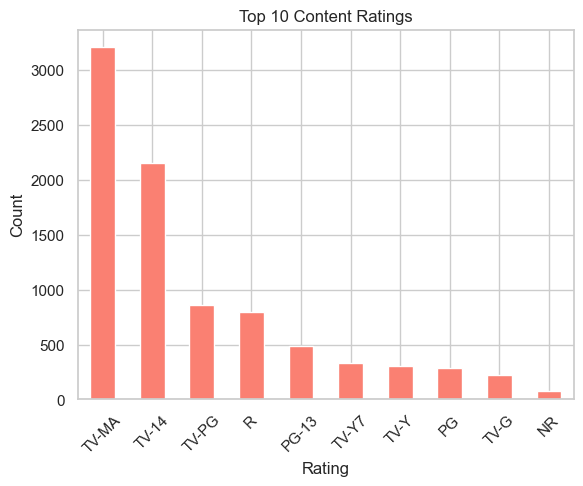

In [9]:
# ------------------------------------
# Plot 2: Top 10 Content Ratings
# ------------------------------------
# Bar plot for the most frequent content ratings (like TV-MA, PG, etc.)
df['rating'].value_counts().head(10).plot(kind='bar' , color='salmon')
plt.title('Top 10 Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
           

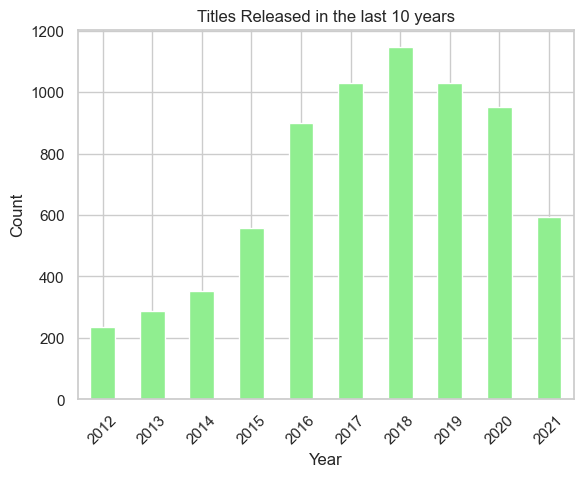

In [10]:
# ------------------------------------
# Plot 3: Titles Released in the Last 10 Years
# ------------------------------------
# Bar plot showing number of titles released each year (latest 10 years)
df['release_year'].value_counts().sort_index(ascending=False).head(10).sort_index().plot(kind='bar',color='lightgreen')
plt.title('Titles Released in the last 10 years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


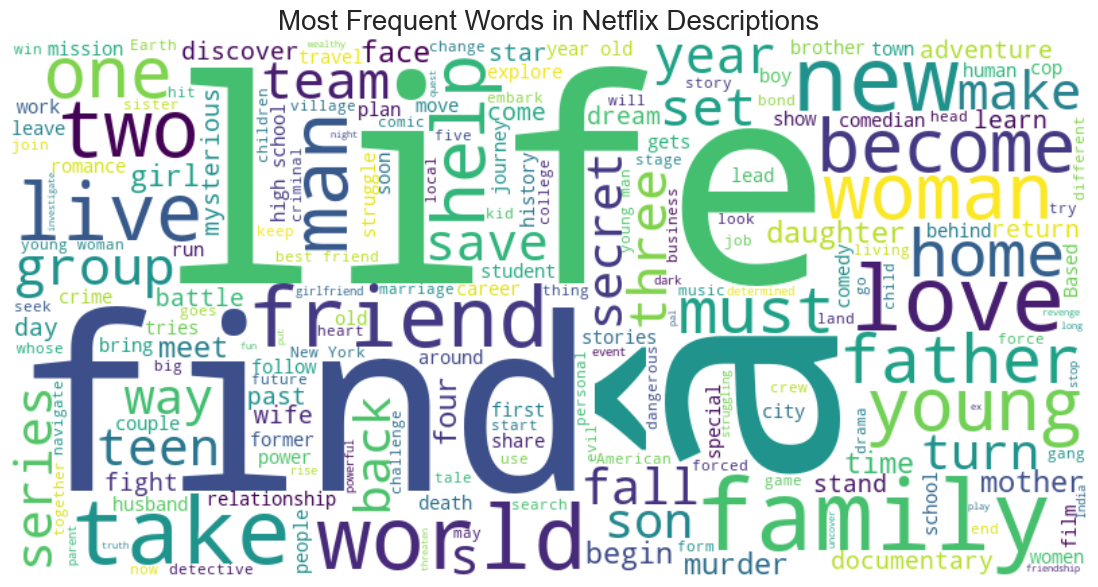

In [11]:
!pip install wordcloud
#Import required libraries
from wordcloud import WordCloud  
import matplotlib.pyplot as plt  

#Join all non-null descriptions into a single string
text = ' '.join(df['description'].dropna())

#Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))           # Set the size of the figure
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud image
plt.axis('off')                        # Turn off axis
plt.title('Most Frequent Words in Netflix Descriptions', fontsize=20)  # Add title
plt.show()


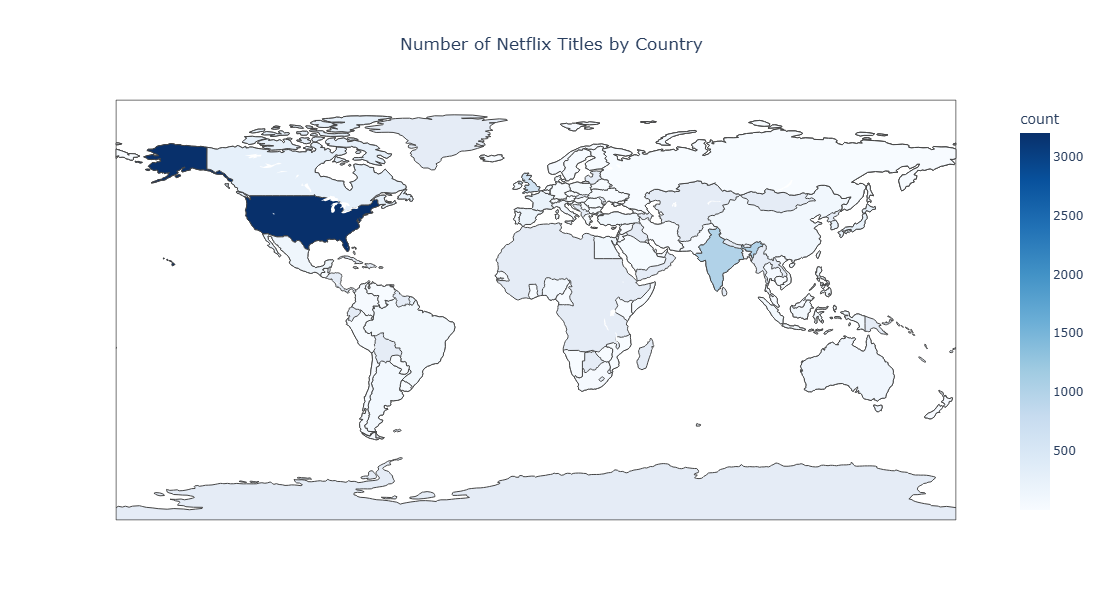

In [12]:
# Import required libraries
import plotly.express as px
import pandas as pd

# Clean and prepare country data
# Many entries may have multiple countries separated by commas, we'll take the first one
df['main_country'] = df['country'].dropna().apply(lambda x: x.split(',')[0].strip())

# Count number of titles per country
country_counts = df['main_country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Create a choropleth map using Plotly
fig = px.choropleth(
    country_counts,
    locations='country',                # Column with country names
    locationmode='country names',       # Match on country names
    color='count',                      # Value to color-code
    color_continuous_scale='Blues',     # Color scheme
    title='Number of Netflix Titles by Country'  # Map title
)

# Update layout for bigger size
fig.update_layout(
    width=1000,     # Width in pixels
    height=600,     # Height in pixels
    title_x=0.5     # Center the title
)

# Show the map
fig.show()


In [13]:
#✅ Final Conclusion

#📈 Content Growth: Netflix’s content has seen significant growth over the years, with a major spike beginning in 2016 and peaking in 2018.

#🎬 Content Type: Movies dominate the platform compared to TV Shows.

#🔞 Most Common Rating: The most frequent content rating is 'TV-MA' (Mature Audience Only).

#🎭 Popular Genres: Drama and International content are the most prominent genres offered.

#🌍 Top Countries: The USA contributes the highest number of titles, followed by the UK and India.

#☁️ Visualization Techniques: WordClouds and Choropleth Maps were effective in showcasing popular content themes and global reach.

#📊 Overall Insight: This EDA gives a clear picture of Netflix’s content strategy and user preferences.

